In [58]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

from skimage.exposure import equalize_hist, equalize_adapthist

## Utility functions

In [59]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def convertToGray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def gtb_coordinates(label_path):
    with open(label_path) as file:
        data = file.read().replace('\n', '');
        coords = data.split(' ')
    return coords

## Pre-processing

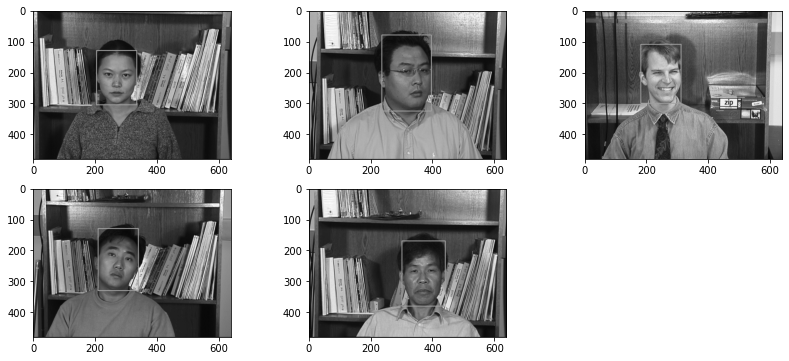

In [61]:
# Generate ground truth bounding boxes in green from provided label files
s1 = cv2.imread('dataset/s1.jpg')
s2 = cv2.imread('dataset/s2.jpg')
s3 = cv2.imread('dataset/s3.jpg')
s4 = cv2.imread('dataset/s4.jpg')
s5 = cv2.imread('dataset/s5.jpg')

s1_coords = gtb_coordinates('labels/lab581')
s2_coords = gtb_coordinates('labels/lab790')
s3_coords = gtb_coordinates('labels/lab364')
s4_coords = gtb_coordinates('labels/lab935')
s5_coords = gtb_coordinates('labels/lab869')

# (x,y,w,h) -> (x_left, y_top, x_right, y_bottom)
s1_gtb = cv2.rectangle(s1, (int(s1_coords[0]), int(s1_coords[1])), (int(s1_coords[2]), int(s1_coords[3])), (0,255,0), 2)
s2_gtb = cv2.rectangle(s2, (int(s2_coords[0]), int(s2_coords[1])), (int(s2_coords[2]), int(s2_coords[3])), (0,255,0), 2)
s3_gtb = cv2.rectangle(s3, (int(s3_coords[0]), int(s3_coords[1])), (int(s3_coords[2]), int(s3_coords[3])), (0,255,0), 2)
s4_gtb = cv2.rectangle(s4, (int(s4_coords[0]), int(s4_coords[1])), (int(s4_coords[2]), int(s4_coords[3])), (0,255,0), 2)
s5_gtb = cv2.rectangle(s5, (int(s5_coords[0]), int(s5_coords[1])), (int(s5_coords[2]), int(s5_coords[3])), (0,255,0), 2)

# Convert to grayscale
s1_gray = convertToGray(s1_gtb)
s2_gray = convertToGray(s2_gtb)
s3_gray = convertToGray(s3_gtb)
s4_gray = convertToGray(s4_gtb)
s5_gray = convertToGray(s5_gtb)

plt.figure(figsize=(14,6))
plt.subplot(2,3,1)
plt.imshow(s1_gray, cmap='gray')
plt.subplot(2,3,2)
plt.imshow(s2_gray, cmap='gray')
plt.subplot(2,3,3)
plt.imshow(s3_gray, cmap='gray')
plt.subplot(2,3,4)
plt.imshow(s4_gray, cmap='gray')
plt.subplot(2,3,5)
plt.imshow(s5_gray, cmap='gray')

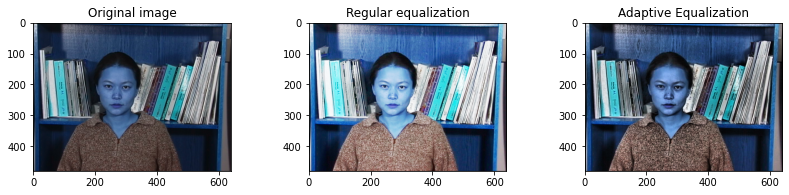

In [21]:
# Histogram Equalization
img_eq1 = equalize_hist(cv2.imread('dataset/01.jpg'))
img_eq2 = equalize_adapthist(cv2.imread('dataset/01.jpg'))
plt.figure(figsize=(14,6))
plt.subplot(2,3,1)
plt.imshow(cv2.imread('dataset/01.jpg')); plt.title('Original image')
plt.subplot(2,3,2)
plt.imshow(img_eq1); plt.title('Regular equalization')
plt.subplot(2,3,3)
plt.imshow(img_eq2); plt.title('Adaptive Equalization');

## Original Haar Cascades

### Experiment 1 - scaleFactor=1.1, minNeighbors=4

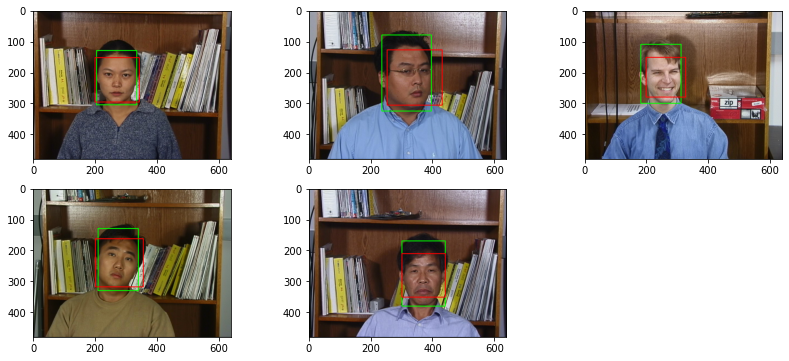

In [72]:
def original_haar_cascades(image, image_gray):
    haar_cascade_face = cv2.CascadeClassifier('haar_xml/haarcascade_frontalface_default.xml')
    face_rects = haar_cascade_face.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=4)

    for (x,y,w,h) in face_rects:
        cv2.rectangle(image, (x,y), (x+w, y+h), (0,0,255), 2)
    
    return convertToRGB(image)

s_h_1 = original_haar_cascades(s1_gtb, s1_gray)
s_h_2 = original_haar_cascades(s2_gtb, s2_gray)
s_h_3 = original_haar_cascades(s3_gtb, s3_gray)
s_h_4 = original_haar_cascades(s4_gtb, s4_gray)
s_h_5 = original_haar_cascades(s5_gtb, s5_gray)

# Predicted bounding box in red
plt.figure(figsize=(14,6))
plt.subplot(2,3,1)
plt.imshow(s_h_1)
plt.subplot(2,3,2)
plt.imshow(s_h_2)
plt.subplot(2,3,3)
plt.imshow(s_h_3)
plt.subplot(2,3,4)
plt.imshow(s_h_4)
plt.subplot(2,3,5)
plt.imshow(s_h_5)

### Experiment 2 - scaleFactor=, minNeighbors=

### Intersection over Union (IoU)

In [ ]:
def bb_intersection_over_union(boxA, boxB):
    # Determine the 

## LBP-based Haar Cascades

In [4]:
#code

## HOG+SVM Face Detection

In [5]:
#code